# Model Evaluation

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from tqdm import tqdm
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix

## Import Data

In [2]:
X_val = pd.read_hdf("data/classifier/validation.h5", key="X")
y_val = pd.read_hdf("data/classifier/validation.h5", key="y")

In [3]:
X_val

,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron2_PT,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights,Sample
478550,3,358.058807,338.709229,295.140076,0.000000,0.0,44.548653,90.482277,18.628500,0.000000,...,45.071972,0.015857,-0.316787,-2.137243,-1.453273,38.457283,2.189708,1111.343018,5.669990e-03,Zjj_2L
106828,3,1258.247314,473.840485,321.833496,0.000000,0.0,189.970169,121.188896,54.967724,0.000000,...,0.000000,0.398338,0.000000,0.724570,0.000000,621.355652,1.101326,2417.272461,5.528279e-07,mch45_HG_13TeV_wohg_HQ1200_train
1620719,4,509.437256,508.710205,228.818665,208.681702,0.0,100.889992,113.048668,39.918079,63.216160,...,0.000000,0.000000,0.000000,0.000000,0.000000,289.961121,-0.486590,1455.832031,2.641252e-07,smg
398965,1,357.191803,0.000000,0.000000,0.000000,0.0,137.860748,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,134.883530,-2.982880,615.318848,4.288775e-07,ttbarH_2L
2814148,1,231.535751,0.000000,0.000000,0.000000,0.0,27.718456,0.000000,0.000000,0.000000,...,0.000000,1.156169,0.000000,0.543005,0.000000,95.852730,2.400199,624.673035,1.378894e-04,ttbarj_2L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63772,4,1449.383057,1026.406738,552.145203,365.067535,0.0,95.198288,282.677094,109.622353,142.786301,...,100.422897,0.444952,0.689231,-1.906012,-1.912596,79.805260,-2.009616,3485.074463,5.528279e-07,mch45_HG_13TeV_wohg_HQ1200_train
1964373,2,220.826935,213.473984,0.000000,0.000000,0.0,21.620426,86.655922,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.081882,1.097173,616.362610,3.814672e-04,Zbj_2L
3147567,1,321.757874,0.000000,0.000000,0.000000,0.0,90.122818,0.000000,0.000000,0.000000,...,0.000000,1.282034,0.000000,-2.095624,0.000000,262.682343,-1.632029,535.886414,1.378894e-04,ttbarj_2L
2207006,1,211.370789,0.000000,0.000000,0.000000,0.0,27.245939,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.206519,1.486096,470.429718,3.814672e-04,Zbj_2L


In [4]:
# Remove samples and weights from X_val
val_samples = X_val["Sample"]
val_weights = X_val["gen_weights"]
X_val.drop(["Sample", "gen_weights"], axis=1, inplace=True)

## Import model

In [5]:
name = "Hidden:100,100,100,100,100|BatchS:1024|Dropout:0.15|BatchNorm|NAdam"
model = keras.models.load_model("models/" + name + ".h5")

## Metrics 

In [6]:
y_preds = model.predict(X_val.values)

In [7]:
print("Model Accuracy:", accuracy_score(y_preds.round(), y_val.values))

Model Accuracy: 0.8673756397430878


AUC Score: 0.9929231662415062


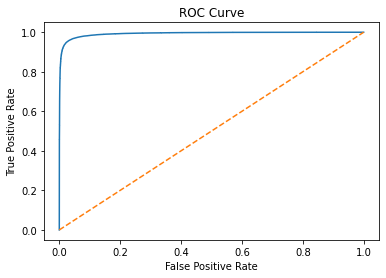

In [8]:
fpr, tpr, thr = roc_curve(y_val.values, y_preds, sample_weight=val_weights.values)

print("AUC Score:", roc_auc_score(y_val.values, y_preds, sample_weight=val_weights.values))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

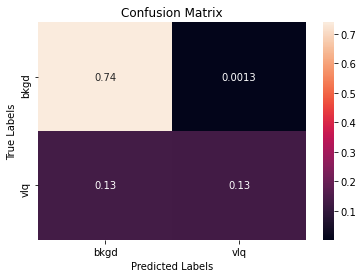

In [9]:
cm = confusion_matrix(y_val.values, y_preds.round(), normalize="all")

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.xaxis.set_ticklabels(["bkgd", "vlq"])
ax.yaxis.set_ticklabels(["bkgd", "vlq"])
plt.show()

# MCDropout

In [10]:
num_models = 100
mcpreds = []

for _ in tqdm(range(num_models), total=num_models, desc="MCDropout"):
    mcpreds.append(model.predict(X_val))
    
mcpreds = np.array(mcpreds)

MCDropout: 100%|██████████| 100/100 [10:09<00:00,  6.10s/it]


In [11]:
mc_means = mcpreds.mean(axis=0)
mc_stds = mcpreds.std(axis=0)

In [12]:
print("MCDropout Accuracy:", accuracy_score(mc_means.round(), y_val))

MCDropout Accuracy: 0.8702572020935728


MCDropout AUC Score: 0.9956623356273355


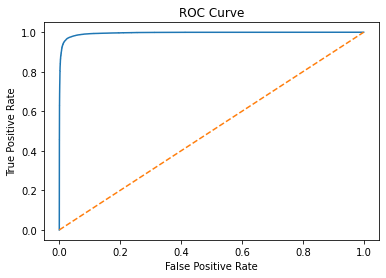

In [13]:
fpr, tpr, thr = roc_curve(y_val.values, mc_means, sample_weight=val_weights.values)

print("MCDropout AUC Score:", roc_auc_score(y_val.values, mc_means, sample_weight=val_weights.values))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

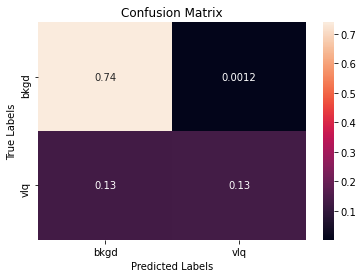

In [14]:
cm = confusion_matrix(y_val.values, mc_means.round(), normalize="all")

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.xaxis.set_ticklabels(["bkgd", "vlq"])
ax.yaxis.set_ticklabels(["bkgd", "vlq"])
plt.show()

# MCDropout STDs by class

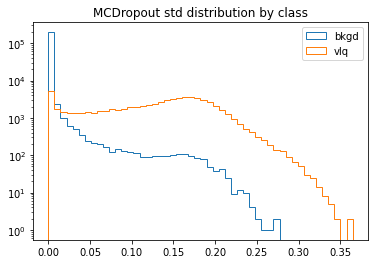

In [15]:
hist_min = min(mc_stds[y_val == 0].min(), mc_stds[y_val == 1].min())
hist_max = max(mc_stds[y_val == 0].max(), mc_stds[y_val == 1].max())
hist_range = (hist_min, hist_max)

plt.title("MCDropout std distribution by class")
plt.hist(mc_stds[y_val == 0], label="bkgd", bins=50, range=hist_range, histtype="step")
plt.hist(mc_stds[y_val == 1], label="vlq", bins=50, range=hist_range, histtype="step")
plt.yscale("log")
plt.legend()
plt.savefig("plots/mcdropout_std_distribution_by_class.png", dpi=500)
plt.show()

# MCDropout STDs by sample

In [16]:
samples = glob("data/dileptonic/*.csv")
samples += glob("data/sm_gluon_vlq/*.csv")
samples = [sample.split("/")[-1].split(".")[0] for sample in samples]

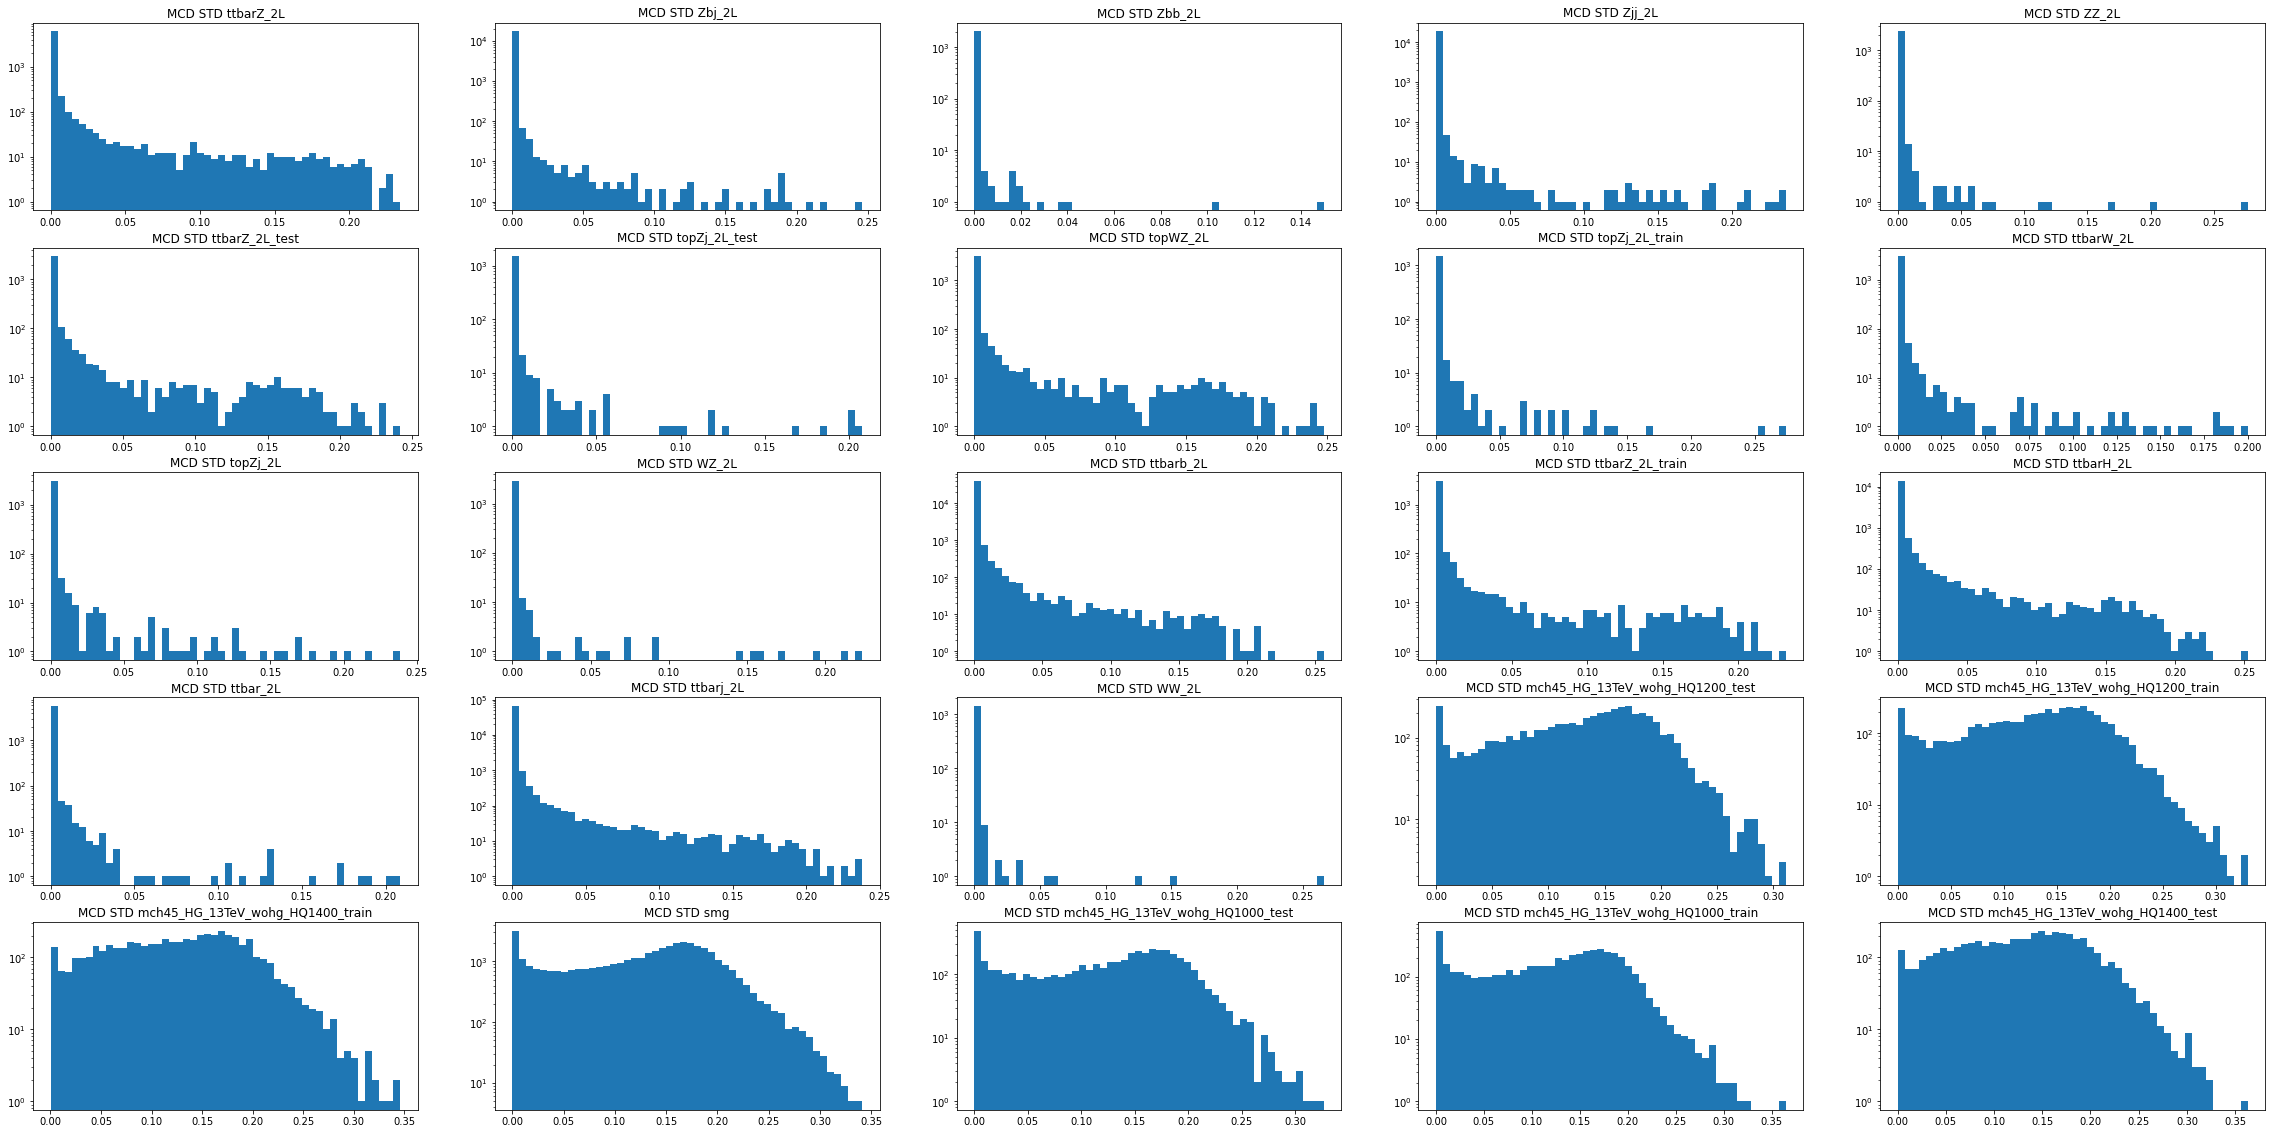

In [17]:
# Plot adjustment variables
num_cols, bins = 5, 50

# Generate the plots
num_rows = int(np.ceil((len(samples)) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 20))

# Iterate and generate each data
for i, sample in enumerate(samples):
    # Plot the data
    row, col = int(i/num_cols), i%num_cols
    axs[row, col].set_title("MCD STD " + sample)
    axs[row, col].hist(mc_stds[val_samples==sample], bins=50)
    axs[row, col].set_yscale("log")
    
plt.savefig("plots/stds_distribution_mcd_per_sample.png", dpi=500)
plt.show()

# Std vs Means plot

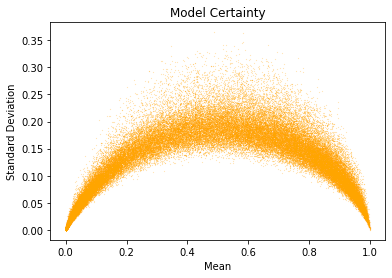

In [19]:
plt.title("Model Certainty")
plt.scatter(mc_means, mc_stds, s=0.01, color='orange')
plt.ylabel("Standard Deviation")
plt.xlabel("Mean")
plt.show()